In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("aerofit_treadmill.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [26]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [5]:
df.shape

(180, 9)

In [6]:
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


*   # There are no missing values in the data.
*   # There are 3 unique products in the dataset.
*   # KP281 is the most frequent product.
*   # Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
*   # Out of 180 data points, 104's gender is Male and rest are the female.


In [7]:
df.Product.value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64


*   # 44.44% of the customers have purchased KP2821 product.
*   # 33.33% of the customers have purchased KP481 product
*   # 22.22% of the customers have purchased KP781 product.



In [28]:
df.Gender.value_counts(normalize=True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

# 57.78% of the customers are Male.

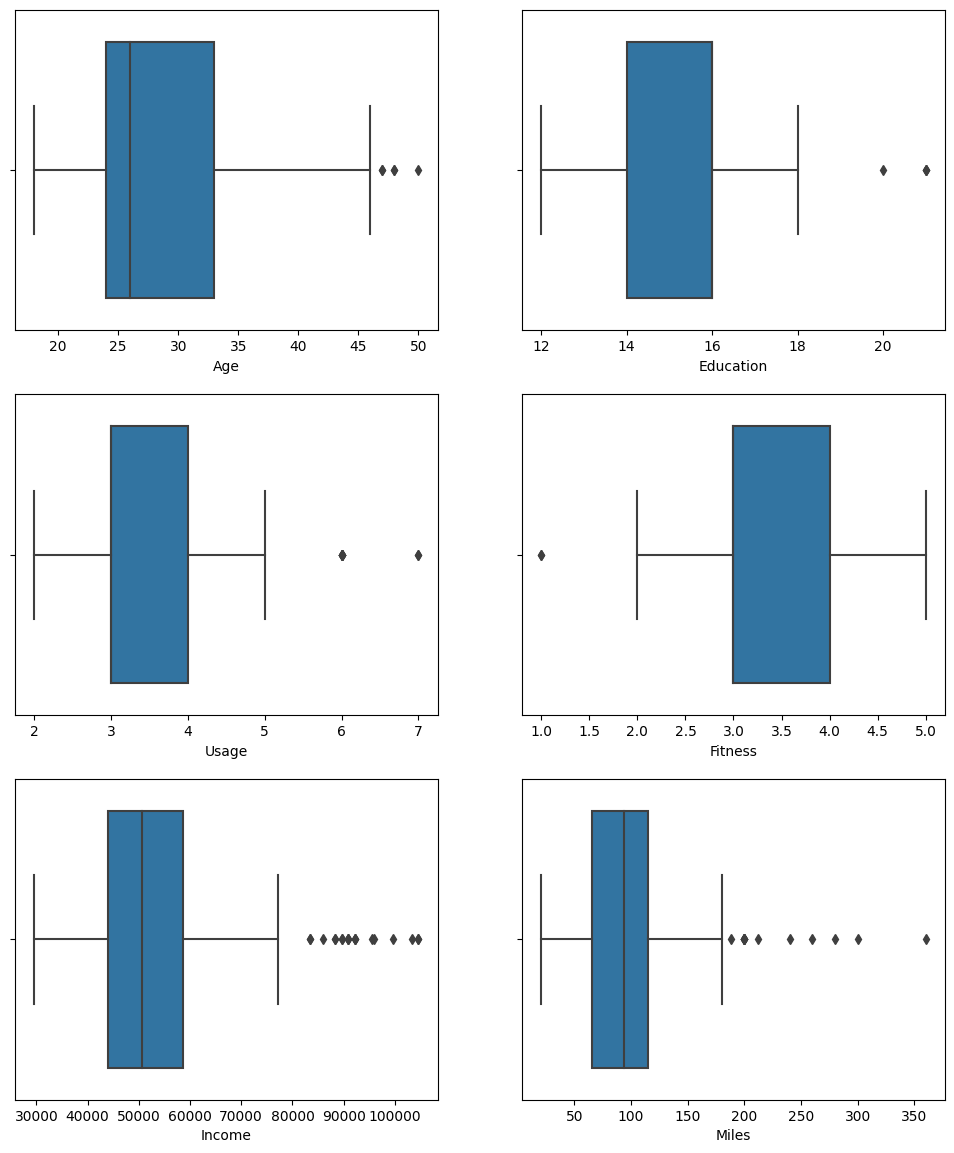

In [27]:
#Outliers detection using BoxPlots
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()


*   #   Age, Education and Usage are having very few outliers.
*   #   While Income and Miles are having more outliers.




In [8]:
# given : Male >>> first subset data only for males
df[df.Gender=="Male"]["Product"].value_counts(normalize=True)*100

KP281    38.461538
KP781    31.730769
KP481    29.807692
Name: Product, dtype: float64

In [9]:
df[df.Gender=="Female"]["Product"].value_counts(normalize=True)*100

KP281    52.631579
KP481    38.157895
KP781     9.210526
Name: Product, dtype: float64

In [10]:
df[df.Product=="KP781"]["MaritalStatus"].value_counts(normalize = True)*100

Partnered    57.5
Single       42.5
Name: MaritalStatus, dtype: float64

In [11]:
df[df.Product=="KP481"]["MaritalStatus"].value_counts(normalize = True)*100

Partnered    60.0
Single       40.0
Name: MaritalStatus, dtype: float64

In [12]:
df[df.Product=="KP281"]["MaritalStatus"].value_counts(normalize = True)*100

Partnered    60.0
Single       40.0
Name: MaritalStatus, dtype: float64

In [15]:
pd.crosstab(df.Product, df.Gender, normalize=True)*100

Gender,Female,Male
Product,,
KP281,22.222222,22.222222
KP481,16.111111,17.222222
KP781,3.888889,18.333333


In [41]:
pd.crosstab(df.Product, df.MaritalStatus, normalize=True)*100

MaritalStatus,Partnered,Single
Product,,
KP281,26.666667,17.777778
KP481,20.000000,13.333333
KP781,12.777778,9.444444


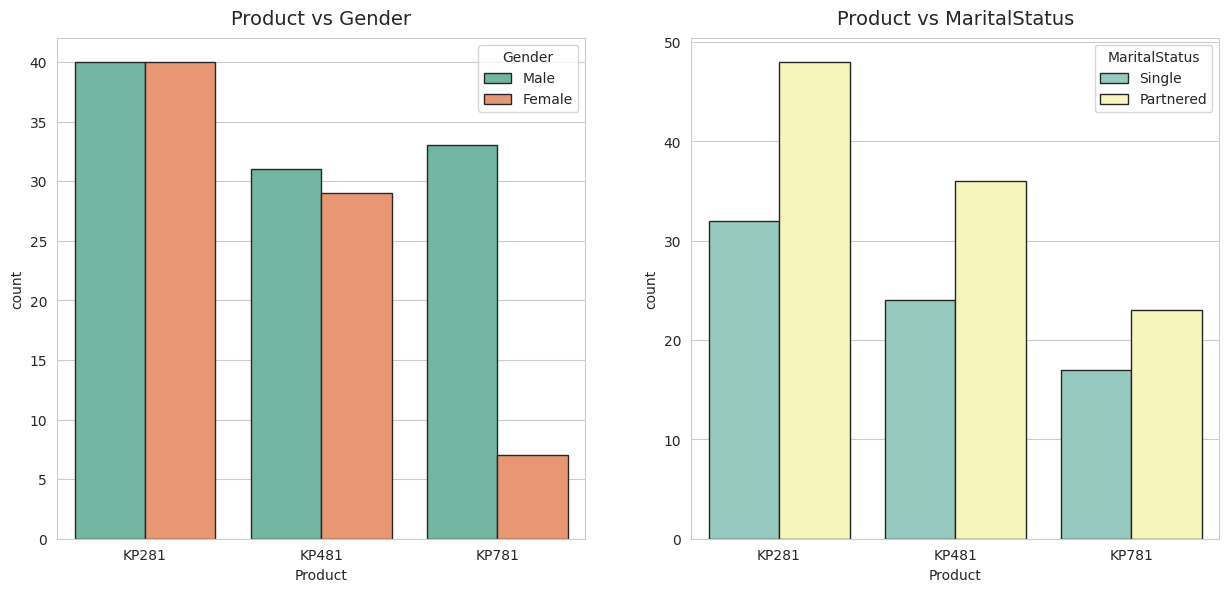

In [29]:
#Gender or MaritalStatus have any effect on the product purchased.
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**# Product vs Gender**
*   ## Equal number of males and females have purchased KP281 product and Almost same for the product KP481.
*   ## Most of the Male customers have purchased the KP781 product.

**# Product vs MaritalStatus**
*   ## Customer who is Partnered, is more likely to purchase the product.

In [13]:
pd.crosstab(df.Gender, df.Fitness, normalize=True)*100

Fitness,1,2,3,4,5
Gender,,,,,
Female,0.555556,8.888889,25.000000,4.444444,3.333333
Male,0.555556,5.555556,28.888889,8.888889,13.888889



*   ## **Males are more fit in comparitive to females.**




In [14]:
pd.crosstab(df.Product, df.Fitness, normalize=True)*100

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.555556,7.777778,30.000000,5.000000,1.111111
KP481,0.555556,6.666667,21.666667,4.444444,0.000000
KP781,0.000000,0.000000,2.222222,3.888889,16.111111


## **The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.**

In [16]:
pd.crosstab(df.Product, df.Education, normalize=True)*100

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,1.111111,1.666667,16.666667,2.222222,21.666667,1.111111,0.000000,0.000000
KP481,0.555556,1.111111,12.777778,0.555556,17.222222,1.111111,0.000000,0.000000
KP781,0.000000,0.000000,1.111111,0.000000,8.333333,10.555556,0.555556,1.666667



*   ## Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
*   ## While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.



In [18]:
pd.crosstab(df.Product, df.Usage, normalize=True)*100

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,10.555556,20.555556,12.222222,1.111111,0.000000,0.000000
KP481,7.777778,17.222222,6.666667,1.666667,0.000000,0.000000
KP781,0.000000,0.555556,10.000000,6.666667,3.888889,1.111111


## Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
## While the other customers are likely to purchasing KP281 or KP481.

In [19]:
(df[df.Product=="KP781"]["Miles"].value_counts(normalize = True)*100).head()

100    17.5
200    15.0
180    15.0
160    12.5
150    10.0
Name: Miles, dtype: float64

In [20]:
(df[df.Product=="KP481"]["Miles"].value_counts(normalize = True)*100).head()

95     20.000000
85     18.333333
106    13.333333
53     11.666667
64     10.000000
Name: Miles, dtype: float64

In [21]:
(df[df.Product=="KP281"]["Miles"].value_counts(normalize = True)*100).head()

85    20.00
75    12.50
66    12.50
47    11.25
94    10.00
Name: Miles, dtype: float64

## **If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.**

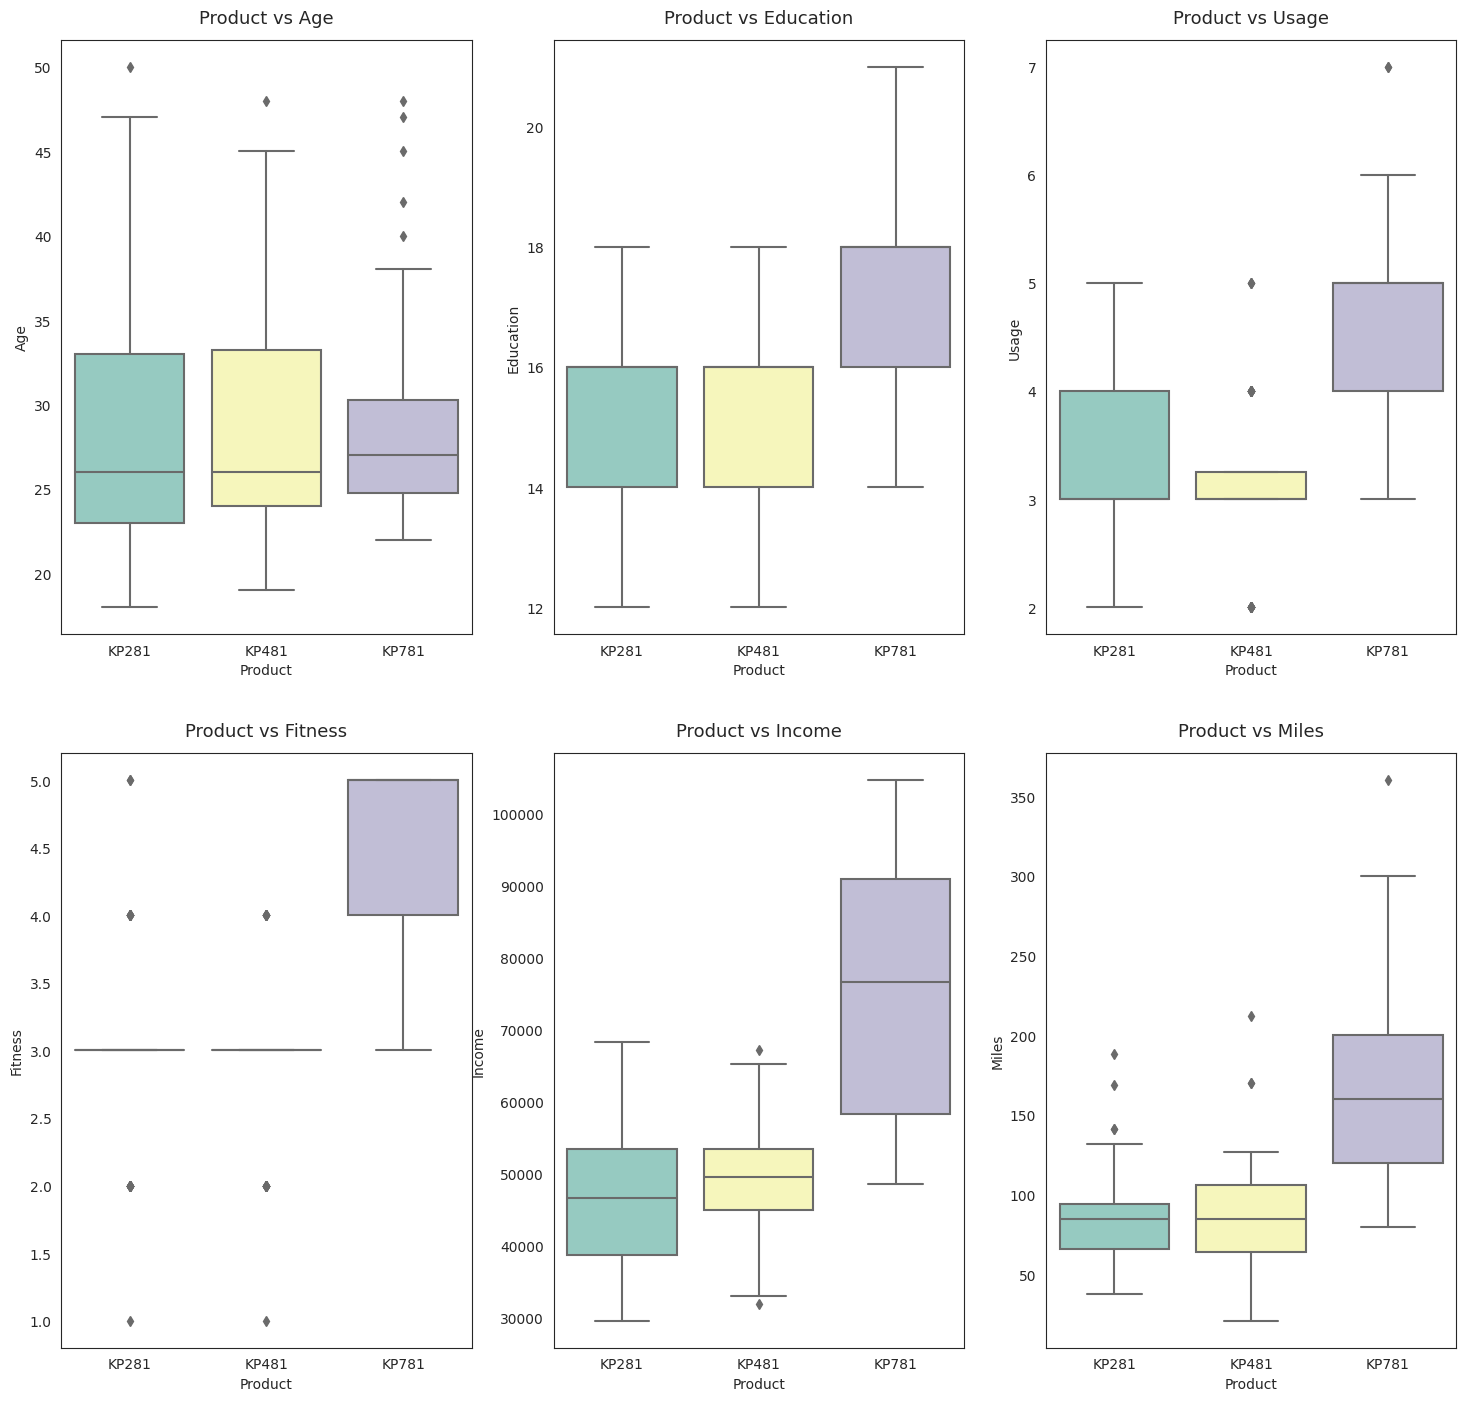

In [31]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

## Customers purchasing products KP281 & KP481 are having same Age median value.
## Customers whose age lies between 25-30, are more likely to buy KP781 product.
## Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

## **Computing Marginal & Conditional Probabilities**

In [33]:
#Marginal Probability
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [34]:
#Conditional Probabilities
#Probability of each product given gender
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."

    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-34-10314552210c>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
<ipython-input-34-10314552210c>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":


In [44]:
#Probability of each product given MaritalStatus
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."

    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()

    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")

p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-44-f784f0c7013e>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
<ipython-input-44-f784f0c7013e>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
